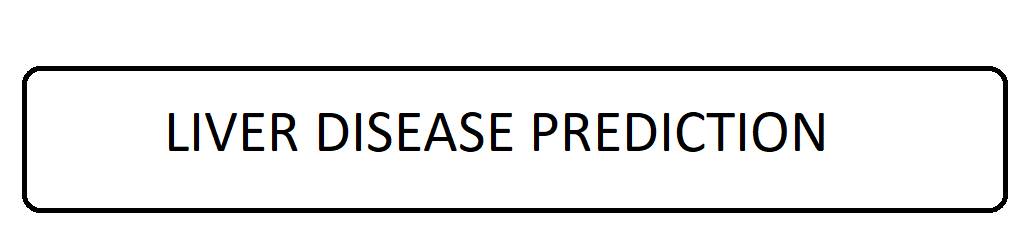

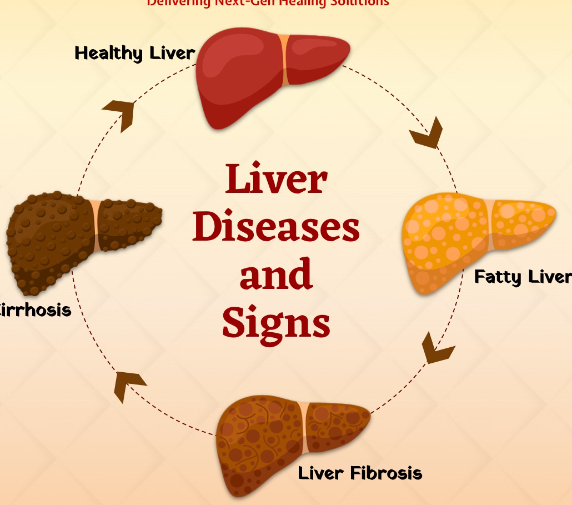

# About Dataset

### Data Set Information
- This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 'is_patient' is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.
- Any patient whose age exceeded 89 is listed as being of age "90".

#### Attribute Information
- 1.age-- Age of the patient
- 2.gender-- Gender of the patient
- 3.tot_bilirubin-- Total Bilirubin
- 4.direct_bilirubin --Direct Bilirubin
- 5.alkphos-- Alkaline Phosphotase
- 6.sgpt --Alamine Aminotransferase
- 7.sgot --Aspartate Aminotransferase
- 8.tot_proteins --Total Protiens
- 9.albumin-- Albumin
- 10.ag_ratio-- Albumin and Globulin Ratio
- 11.is_patient --Selector field used to split the data into two sets (labeled by the experts)

# Dealing the data prediction using Pycaret Package

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 94.4 MB/s eta 0

# Import Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Loading and Reading data

In [5]:
dataset=pd.read_csv('/Indian Liver Patient Dataset (ILPD).csv')

In [6]:
dataset.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Split data into Train and Test

In [42]:
Train=dataset.sample(frac=0.90,random_state=None).reset_index(drop=True)
Test=dataset.drop(Train.index).reset_index(drop=True)

In [45]:
print('DATA MODELLING:',(Train.shape))
print('DATA FOR PREDICTION:',(Test.shape))

DATA MODELLING: (525, 11)
DATA FOR PREDICTION: (58, 11)


# Setting up an Environment in Pycaret

In [46]:
from pycaret.classification import *
exp_clf=setup(data=data,target='is_patient',session_id=127)

,Description,Value
0,Session id,127
1,Target,is_patient
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(525, 11)"
5,Transformed data shape,"(525, 11)"
6,Transformed train set shape,"(367, 11)"
7,Transformed test set shape,"(158, 11)"
8,Ordinal features,1
9,Numeric features,9


# Comparing models

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7247,0.7504,0.3527,0.5725,0.4216,0.2573,0.2767,0.3460
xgboost,Extreme Gradient Boosting,0.7246,0.7264,0.4009,0.5337,0.4442,0.2751,0.2836,0.1950
ridge,Ridge Classifier,0.7224,0.0000,0.1973,0.5917,0.2848,0.1690,0.2075,0.2240
gbc,Gradient Boosting Classifier,0.7221,0.7299,0.3900,0.5516,0.4473,0.2713,0.2838,0.2210
lightgbm,Light Gradient Boosting Machine,0.7191,0.7181,0.3891,0.5267,0.4404,0.2629,0.2703,0.2130
lda,Linear Discriminant Analysis,0.7169,0.7282,0.2336,0.5314,0.3168,0.1787,0.2023,0.2380
ada,Ada Boost Classifier,0.7166,0.7227,0.4627,0.5096,0.4732,0.2860,0.2918,0.2230
et,Extra Trees Classifier,0.7164,0.7490,0.3700,0.5350,0.4295,0.2510,0.2622,0.4390
lr,Logistic Regression,0.7115,0.7488,0.3255,0.5160,0.3852,0.2161,0.2300,0.8290
dummy,Dummy Classifier,0.7058,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=127, verbose=0, warm_start=False)

#### The best model is RandomForest for the dataset

# Creating model

In [27]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7027,0.7902,0.2727,0.5000,0.3529,0.1811,0.1951
1,0.7297,0.8007,0.5455,0.5455,0.5455,0.3531,0.3531
2,0.7027,0.6259,0.1818,0.5000,0.2667,0.1285,0.1544
3,0.7297,0.7850,0.3636,0.5714,0.4444,0.2773,0.2897
4,0.6486,0.6486,0.1818,0.3333,0.2353,0.0322,0.0347
5,0.8108,0.7378,0.5455,0.7500,0.6316,0.5085,0.5202
6,0.7838,0.8479,0.2727,1.0000,0.4286,0.3451,0.4567
7,0.7778,0.7635,0.5000,0.6250,0.5556,0.4098,0.4144
8,0.7222,0.7808,0.3000,0.5000,0.3750,0.2105,0.2219


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### The model is giving on an average the accuracy of 72.47%

## Hyper parameter Tuning

In [28]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.8077,0.1818,0.6667,0.2857,0.1814,0.2400
1,0.7297,0.7972,0.2727,0.6000,0.3750,0.2324,0.2618
2,0.6216,0.5839,0.1818,0.2857,0.2222,-0.0117,-0.0122
3,0.8378,0.7972,0.5455,0.8571,0.6667,0.5664,0.5917
4,0.6486,0.6329,0.0909,0.2500,0.1333,-0.0300,-0.0360
5,0.7297,0.6993,0.2727,0.6000,0.3750,0.2324,0.2618
6,0.7568,0.8322,0.3636,0.6667,0.4706,0.3300,0.3555
7,0.7778,0.8115,0.5000,0.6250,0.5556,0.4098,0.4144
8,0.6667,0.8115,0.3000,0.3750,0.3333,0.1148,0.1160


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


 #### After Hyper parameter tunning we got an accuracy of 72.48%

### Evaluating model

In [29]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Model improvement using PCA:

In [30]:
#exp_clf=setup(data=data,target='is_patient',pca=True,pca_components=0.95,session_id=128)

,Description,Value
0,Session id,128
1,Target,is_patient
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(525, 11)"
5,Transformed data shape,"(525, 3)"
6,Transformed train set shape,"(367, 3)"
7,Transformed test set shape,"(158, 3)"
8,Ordinal features,1
9,Numeric features,9


In [31]:
#compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7058,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2610
lda,Linear Discriminant Analysis,0.7058,0.7183,0.0000,0.0000,0.0000,0.0000,0.0000,0.1810
dummy,Dummy Classifier,0.7058,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1680
lr,Logistic Regression,0.6976,0.7283,0.0182,0.0500,0.0267,-0.0034,-0.0172,0.1750
ada,Ada Boost Classifier,0.6785,0.6826,0.2973,0.4564,0.3488,0.1498,0.1610,0.3270
gbc,Gradient Boosting Classifier,0.6595,0.6670,0.3345,0.4349,0.3716,0.1430,0.1494,0.5850
knn,K Neighbors Classifier,0.6540,0.6527,0.3882,0.4060,0.3925,0.1534,0.1545,0.1770
xgboost,Extreme Gradient Boosting,0.6431,0.6125,0.3336,0.3769,0.3509,0.1082,0.1092,0.1990
et,Extra Trees Classifier,0.6375,0.6557,0.3045,0.3625,0.3264,0.0833,0.0853,0.4920
rf,Random Forest Classifier,0.6323,0.6462,0.2955,0.3379,0.3083,0.0659,0.0661,0.6230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=128, solver='auto',
                tol=0.0001)

### The model is performing well before PCA

### PREDICTION:

In [39]:
unseen_prediction=predict_model(tuned_rf,data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8621,0.9708,0.5000,0.8750,0.6364,0.5589,0.5923


In [40]:
unseen_prediction


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,prediction_label,prediction_score
0,53,Female,0.900000,0.200000,210,35,32,8.0,3.9,0.90,1,2,0.5441
1,46,Male,9.400000,5.200000,268,21,63,6.4,2.8,0.80,0,1,0.9186
2,40,Male,3.500000,1.600000,298,68,200,7.1,3.4,0.90,0,1,0.9741
3,45,Male,1.700000,0.800000,315,12,38,6.3,2.1,0.50,0,1,0.8201
4,55,Male,3.300000,1.500000,214,54,152,5.1,1.8,0.50,0,1,0.9950
5,22,Female,1.100000,0.300000,138,14,21,7.0,3.8,1.10,1,2,0.7615
6,40,Male,30.799999,18.299999,285,110,186,7.9,2.7,0.50,0,1,0.9889
7,62,Male,0.700000,0.200000,162,12,17,8.2,3.2,0.60,1,2,0.5047
8,46,Female,1.400000,0.400000,298,509,623,3.6,1.0,0.30,0,1,0.9015
9,39,Male,1.600000,0.800000,230,88,74,8.0,4.0,1.00,1,1,0.7034


# save model for deployment

In [37]:
save_model(tuned_rf,'tuned_model_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'tot_bilirubin',
                                              'direct_bilirubin', 'tot_proteins',
                                              'albumin', 'ag_ratio', 'sgpt',
                                              'sgot', 'alkphos'],
                                     transformer=SimpleImputer(a...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='gini',
                                         max_depth=7, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
   

### BEST MODEL:RANDOMFORESTCLASSIFIER(72.48%)